In [ ]:
#负样本：
# normal  里面挑选非normal
#非normal 里面挑选normal
#正样本：
#非normal标签语料对应

## 负样本构建

### 难负样本语义

In [2]:
import pandas as pd

data = pd.read_excel(r"D:\code\qiji_compet\code\data\match_data\final_data_v2.xlsx")

In [3]:
def len_sep(text1, text2):
    if len(text1) < 10 and len(text2) < 10:
        return True
    if 10 <= len(text1) <= 20 and 10 <= len(text2) <= 20:
        return True
    if 20 <= len(text1) <= 40 and 20 <= len(text2) <= 40:
        return True
    if 40 <= len(text1) <= 100 and 40 <= len(text2) <= 100:
        return True
    if 100 <= len(text1) and 100 <= len(text2):
        return True
    return False


In [4]:
import re
data=data[~data["text"].apply(lambda x:True if pd.isna(x) else False)]
data["text"]=data["text"].apply(lambda x:str(x).replace(" ","" ))
data["text"]=data["text"].apply(lambda x:re.sub(r'[\W]','',x))

In [5]:
data

,Unnamed: 0,text,sentence_bag,label_bag,final_label,true_label,score,result
0,0,亻尔女马阴道里长了一颗毒瘤待我一颗手雷扔进去瞬间可以把亻尔女马阴道开拓成宽阔无涯的大黑辶畐,['您好我是做无抵押无担保信用借款的正规安全高效无论你是上班族还是做生意或者有车有房都可以申...,"['AD', 'NORMAL', 'FUCK', 'FAKE', 'FUCK']",FUCK,1,"[-1.1920929e-07, 0.06279123, 0.068983555, 0.07...",False
1,1,你这废物鸡巴跟牙签一样插到你母狗妈的水缸逼里都搅不动天天在这对太阳乱吠也不会有三眼怪过来捡你...,"['我们党员数', 'NAMEPLACE电梯现房NAME中环境优美NAME每平方米DIGIT...","['NORMAL', 'AD', 'AD', 'NORMAL', 'AD']",AD,1,"[8.34465e-07, 0.0053709745, 0.017130435, 0.017...",False
2,2,操你妈的半夜瞎jb吹还发鬼吓我黑名单见,['唯品会狂欢你独享NAMENAME碧黄油满DIGIT返DIGIT组合券无敌超值URLed回...,"['AD', 'FUCK', 'NORMAL', 'NORMAL', 'NORMAL']",NORMAL,1,"[0.3087051, 0.3090433, 0.30923915, 0.31345677,...",False
3,3,我在你妈逼里自由翱翔你妈哭着夸我真强,"['您好您的信用极好邀您加入工作不限地点時間手机在家操作待遇ioo天詳情QQ', '好久没联...","['AD', 'NORMAL', 'FUCK', 'FUCK', 'NORMAL']",NORMAL,1,"[2.9802322e-07, 0.0091718435, 0.013031483, 0.0...",False
4,4,人本初性本善锅里煮个大鸡蛋给我吃我就干不给我吃咱就散,"['博主该去看望下你失散多年的亲人@人民日报编辑部做个dna检测吧', '这样啊，我说怎么到...","['NORMAL', 'NORMAL', 'FUCK', 'FUCK', 'FUCK']",FUCK,1,"[-7.1525574e-07, 0.007786751, 0.013712704, 0.0...",False
...,...,...,...,...,...,...,...,...
7132,7132,cao你妈,"['你在我⾯前玩次会简直就是班⻔弄斧我随随便便打出⼀个字你婊⼦妈都能爆体⽽亡', '移动手机...","['FUCK', 'AD', 'POLITICAL', 'NORMAL', 'NORMAL']",NORMAL,1,"[0.0, 0.22793674, 0.24371147, 0.26400894, 0.27...",False
7133,7133,这期时尚旅游杂志确实有点内个坐办公室看完全身未动心已远这班眼瞅没法上了雷达太多你们是要闹哪样...,['世纪百悦月至日DIGIT枚钻戒折黄金每克最高优惠DIGIT内衣折后满再送会员双倍积分PL...,"['AD', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL']",NORMAL,0,"[-1.1920929e-06, 0.18689656, 0.18857586, 0.189...",False
7134,7134,今天到龙海坐浙三轮车台拉风了,['@远源的小背篓你这个垃圾粉，你也不看看尼加主子去年宣传小王子没，心机boy你好意思说，我...,"['FUCK', 'NORMAL', 'FUCK', 'NORMAL', 'AD']",FUCK,0,"[-9.536743e-07, 0.3445171, 0.35620058, 0.39621...",False
7135,7135,有在看澳网男单决赛的吗看比赛需要吼起来,['惊喜周末满DIGIT返DIGIT元包邮亿会员DIGIT亿回馈狂欢尽在URL回td退订唯品...,"['AD', 'NORMAL', 'POLITICAL', 'AD', 'AD']",AD,0,"[0.3886714, 0.39686632, 0.39831716, 0.40285844...",False


In [6]:
data_normal = data[data.true_label == 0]
data_nonormal = data[data.true_label == 1]


In [7]:
data_normal

,Unnamed: 0,text,sentence_bag,label_bag,final_label,true_label,score,result
5,5,新款到每日一新特的曲剪裁鞋面充知性典雅的古息吸睛指破表背完美合的曲彷量身般不需害怕扭到好走又...,['烟台移动送惊喜啦拿起手机参与PLACE豪礼大作战活动即有机会赢取缤纷话费和DIGIT个流...,"['AD', 'NORMAL', 'AD', 'NORMAL', 'FAKE']",AD,0,"[0.25075668, 0.2641062, 0.2700566, 0.2785626, ...",False
6,6,在开学的前一日里我会求佛祖保佑老师重新安排的座位是靠墙或靠窗这样就有了一个相对独立的私密空间...,['靠！这年头骗子太嚣张，盗用我的qq号之后明目张胆的骗钱！太缺德了，但骗子终究是骗子，漏出...,"['NORMAL', 'AD', 'NORMAL', 'NORMAL', 'NORMAL']",NORMAL,0,"[0.23004353, 0.25039077, 0.25298703, 0.2594892...",False
8,8,然后妈妈自己剪了头发现在看起来好像eason啊,"['你的长相真1是不敢恭维……衰的都拖网速…', '通知:今天晚自习在宿舍上，整理好内务，相...","['FUCK', 'NORMAL', 'FUCK', 'FUCK', 'FUCK']",FUCK,0,"[7.748604e-07, 0.27663082, 0.28557074, 0.33199...",False
12,12,我曾经拍摄过两部反应法国华人艺术家以及在威尼斯双年展上中国当代艺术家的纪录片就我所接触的诸如...,"['你在天国和五名乌干达黑人同时拳33交致死的亲妈都决定为你起尸鼓掌', '#早安、沃阁#沃...","['FUCK', 'NORMAL', 'FAKE', 'AD', 'AD']",AD,0,"[0.004813373, 0.28591937, 0.29133403, 0.292331...",False
13,13,买了个山寨手机开机我就哭了,"['你爹我操你吗鍀时候怎么没把你射墙上呢', '良品铺子旗舰店辛苦一年任性一回今天良品品牌团...","['FUCK', 'AD', 'FUCK', 'NORMAL', 'AD']",FUCK,0,"[0.05755824, 0.31656075, 0.33119917, 0.3485463...",False
...,...,...,...,...,...,...,...,...
7130,7130,今天胃口不好买了个冰激凌某品牌朗姆酒葡萄干的ms有一股皮鞋味儿,"['我晚上开会', '马上到了', '#新闺蜜时代##cottonpink北京三里屯店#新闺...","['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'FUCK']",NORMAL,0,"[0.013285756, 0.29031032, 0.2905413, 0.2946975...",False
7131,7131,huang金100秒微直播恭喜辣妈姜蕾可以和儿子tong场表演咯,"['泪水曾经愤怒地掉落', '逼自己吃了两枣粽子两鸡蛋一大袋玻璃海苔强制自己补血补蛋白。免得...","['NORMAL', 'NORMAL', 'FUCK', 'NORMAL', 'NORMAL']",NORMAL,0,"[0.046549976, 0.31177866, 0.31525707, 0.320399...",False
7133,7133,这期时尚旅游杂志确实有点内个坐办公室看完全身未动心已远这班眼瞅没法上了雷达太多你们是要闹哪样...,['世纪百悦月至日DIGIT枚钻戒折黄金每克最高优惠DIGIT内衣折后满再送会员双倍积分PL...,"['AD', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL']",NORMAL,0,"[-1.1920929e-06, 0.18689656, 0.18857586, 0.189...",False
7134,7134,今天到龙海坐浙三轮车台拉风了,['@远源的小背篓你这个垃圾粉，你也不看看尼加主子去年宣传小王子没，心机boy你好意思说，我...,"['FUCK', 'NORMAL', 'FUCK', 'NORMAL', 'AD']",FUCK,0,"[-9.536743e-07, 0.3445171, 0.35620058, 0.39621...",False


In [8]:
sentence_pair = []
count1, count2 = 0, 0
for unit in data_normal.values:
    text = unit[1]
    sentence_bag = eval(unit[2])
    label_bag = eval(unit[3])
    for sentence, label in zip(sentence_bag, label_bag):
        sentence=re.sub(r'[\W]','',sentence)
        if label != "NORMAL" and len_sep(sentence, text):
            count1 += 1
            sentence_pair.append((text, sentence))
for unit in data_nonormal.values:
    text = unit[1]
    sentence_bag = eval(unit[2])
    label_bag = eval(unit[3])
    for sentence, label in zip(sentence_bag, label_bag):
        sentence=re.sub(r'[\W]','',sentence)
        if label == "NORMAL" and len_sep(sentence, text):
            count2 += 1
            sentence_pair.append((text, sentence))

In [9]:
count1, count2,len_sep(sentence, text)

(2682, 1272, False)

In [10]:
sentence_pair[10]

('严重声讨黑兔爷_荷包兔子对一颗好不容易平静之不太衰老的童心吃骡勾引', '您好您在同城游戏代练投的简历已查阅咨询详情联系QQ如有打扰请见谅勿回')

In [11]:
count1, count2,len(sentence_pair)

(2682, 1272, 3954)

In [12]:
import pandas as pd

data2 = pd.read_excel(r"D:\code\qiji_compet\code\data\match_data\final_data_v3.xlsx")

In [13]:
data2=data2[~data2["text"].apply(lambda x:True if pd.isna(x) else False)]
data2["text"]=data2["text"].apply(lambda x:str(x).replace(" ","" ))
data2["text"]=data2["text"].apply(lambda x:re.sub(r'[\W]','',x))
data2

,Unnamed: 0,text,sentence_bag,label_bag,final_label,true_label,score,result
0,0,哇晒这999个不错试睡嘻嘻我来招募嘉宾步步动心菲律宾走起兔头带不了火锅底料木有问题嘻嘻还可以...,"['什么时候回来啊', '滚亻尔女马的去吧算干啥的一个个的我就三个兄弟分流出三千人呵呵兴城市...","['NORMAL', 'FUCK', 'AD', 'FUCK', 'FUCK']",FUCK,0,"[0.1983729, 0.20510757, 0.20553958, 0.20596749...",False
1,1,成都到昆明只需10小时26日上午全长6358公里de云南省武定至昆明高速公路建成通车从昆明经...,"['嘿嘿！够感动了啊~哈哈', '实在气不过希望你速速跪下感谢你爹操$$你这狗婊7子', '...","['NORMAL', 'FUCK', 'FUCK', 'NORMAL', 'AD']",NORMAL,0,"[2.3841858e-07, 0.39450705, 0.41949803, 0.4350...",False
2,2,去年cj亻故的最有意思的一件事是奔向一个领了满身礼品的小伙面前满脸苦相说某某道具已经衤皮领光...,['PLACE亲爱的会员超给力好奇大牌狂欢满DIGIT减DIGIT金装l9仅DIGIT元回t...,"['AD', 'FUCK', 'FUCK', 'NORMAL', 'NORMAL']",FUCK,0,"[0.038355827, 0.19003105, 0.1972574, 0.2008057...",False
3,3,我扌察刚发现原来我已经衤皮这么彻底的拉口丷土灬了拉的太特么全面了这将是人生载入史册的一天没法...,"['拉拉', '生活中有什么不愉快是骂一句时代峰峻我去你吗鍀舒缓不了的呢，如果有，就骂两句。...","['NORMAL', 'FUCK', 'NORMAL', 'AD', 'FUCK']",NORMAL,0,"[0.21356952, 0.2164886, 0.22373891, 0.22425455...",False
4,4,那就去解救啊把那些爹妈和那个磁暴步兵抓起来啊都他女马快成邪教了思考思考思考,['电话可以慢慢聊加拨PHONE打全国电话DIGIT元分钟全包了区内没有漫游费长途费和本地通...,"['AD', 'NORMAL', 'AD', 'NORMAL', 'AD']",AD,1,"[0.26188385, 0.27807593, 0.281398, 0.2822705, ...",False
...,...,...,...,...,...,...,...,...
24973,24973,深夜发吃按老例吃过十来种浇头之后扌奂一家续摊再来碗上海辣肉面,"['我2号回', 'NAME尊敬的会员本期邮报精选咖啡和茶韩食风味火锅季菌菇世界详情请点击U...","['NORMAL', 'AD', 'NORMAL', 'FUCK', 'NORMAL']",NORMAL,0,"[0.035435736, 0.1951598, 0.19608545, 0.2237825...",False
24974,24974,希望不要同一时段播出否则可苦le我们的电视机和遥控器了,['PLACENAME官方旗舰店PLACE加送感谢礼物啦现返店购物满DIGIT赠DIGIT元...,"['AD', 'FUCK', 'FUCK', 'NORMAL', 'NORMAL']",FUCK,0,"[0.040149212, 0.061955094, 0.31685537, 0.31986...",False
24975,24975,7怎么个情况这是,"['连续六天六点多起来了。。。好像回到义务教育阶段。。。', '我真没咋的，你做你的事。就是...","['NORMAL', 'NORMAL', 'NORMAL', 'FUCK', 'AD']",NORMAL,0,"[0.31158972, 0.32722056, 0.33933908, 0.3462677...",False
24976,24976,下午茶日本火车的豪华便当据不完全统计日本至少有5000种列车便当常见的有墨鱼饭黑猪肉章鱼鳟鱼...,['同程旅游尊敬的会员DIGIT元红包已经到账购买旅游产品直抵现金同程旅游周年庆戳URL瞅瞅...,"['AD', 'NORMAL', 'AD', 'AD', 'NORMAL']",AD,0,"[0.012717605, 0.21764576, 0.218876, 0.25234354...",False


In [14]:
data_normal = data2[data2.true_label == 0]
data_nonormal = data2[data2.true_label == 1]
sentence_pair2 = []
count1, count2 = 0, 0
for unit in data_normal.values:
    text = unit[1]
    sentence_bag = eval(unit[2])
    label_bag = eval(unit[3])
    for sentence, label in zip(sentence_bag, label_bag):
        sentence=re.sub(r'[\W]','',sentence)
        if label != "NORMAL" and len_sep(sentence, text):
            count1 += 1
            sentence_pair2.append((text, sentence))
for unit in data_nonormal.values:
    text = unit[1]
    sentence_bag = eval(unit[2])
    label_bag = eval(unit[3])
    for sentence, label in zip(sentence_bag, label_bag):
        sentence=re.sub(r'[\W]','',sentence)
        if label == "NORMAL" and len_sep(sentence, text):
            count2 += 1
            sentence_pair2.append((text, sentence))

In [15]:
len(sentence_pair2), count1, count2

(14115, 9518, 4597)

In [16]:
sentence_pair2[1]

('成都到昆明只需10小时26日上午全长6358公里de云南省武定至昆明高速公路建成通车从昆明经武定攀枝花前往成都的出滇入川大通道shi现全程高速10小时左右可以到达以后去耍更方便啦',
 '你妈东莞卖逼黑直肠烂子宫生了你这么个梅毒三期红斑狼疮烂全身滥交操坏脑子艾滋没救的便宜女儿脑子里装了多少阴沟里下三滥的龌龊思想被蛆蛀的天天意淫精神高潮')

In [17]:
import pandas as pd

data3 = pd.read_excel(r"D:\code\qiji_compet\code\data\match_data\final_data_v4.xlsx")
data3=data3[~data3["text"].apply(lambda x:True if pd.isna(x) else False)]
data3["text"]=data3["text"].apply(lambda x:str(x).replace(" ","" ))
data3["text"]=data3["text"].apply(lambda x:re.sub(r'[\W]','',x))
data3

,Unnamed: 0,text,sentence_bag,label_bag,final_label,true_label,score,result
0,0,这一屋子,"['星期五见吧', '诚信招聘圆您百万梦想全球诚招代理邀您注册即送元彩金欢迎您及时参与共享申...","['NORMAL', 'FAKE', 'NORMAL', 'AD', 'NORMAL']",NORMAL,0,"[-2.3841858e-07, 0.32237124, 0.3498764, 0.3571...",False
1,1,你要不要脸啊被包养很光荣啊滚吧你裴多酱强奸还拿钱拿了30万行了,"['可怜兮兮的杂种狗000送来亲妈不知珍惜被我一招暴雨梨花针击穿大脑鲜红地血液洒满大地;',...","['FUCK', 'AD', 'FUCK', 'FUCK', 'NORMAL']",FUCK,1,"[6.556511e-07, 0.057133794, 0.14088333, 0.2660...",False
2,2,天呐我是在一个什么样的教学楼里面呢刚才语音室给人热一夕匕现在的教室给人冻死整死我算了,['你妈才是狗，你妈死了？算个什么狗东西，么人看得起你，也么人待见你。像狗一样的粘人，贱的也...,"['FUCK', 'FUCK', 'NORMAL', 'NORMAL', 'FUCK']",FUCK,0,"[-3.5762787e-07, 0.026480436, 0.23668945, 0.26...",False
3,3,刚看了一个微博是卖狗肉的该不该吃狗肉的问题上开始了无休止的谩骂大家都吃素吧才能结束争论只抽半...,"['宝贝，晚安！睡个好觉', '⽼⼦游戏菜嘴巴⼜不菜不服对喷啊傻缺', 'PLACE家电月D...","['NORMAL', 'FUCK', 'AD', 'FAKE', 'NORMAL']",NORMAL,0,"[0.24951386, 0.2968135, 0.301713, 0.30177128, ...",False
4,4,我家的狗狗得过细小了单又拉血了怎么办啊急啊,"['雨停了再做。', '宝贝，晚安！睡个好觉', '张老师，我们孩子有点着凉了，今天就在家休...","['NORMAL', 'NORMAL', 'NORMAL', 'AD', 'AD']",NORMAL,0,"[3.5762787e-07, 0.27890158, 0.28155792, 0.2822...",False
...,...,...,...,...,...,...,...,...
3564,3564,那些沙比营销号是怎么做到有这么多沙比脑残粉的互相吸引吗文盲都看不下去了,"['这类货也能混迹大学，也能称作教！授，实在是一个悲哀。教授？呵...呵', '免税香烟批发...","['FUCK', 'AD', 'NORMAL', 'NORMAL', 'FUCK']",FUCK,1,"[0.12113118, 0.124705315, 0.18558967, 0.215743...",False
3565,3565,现在的社会真是被一群忘恩负义的疯子占据忘记自己得国家忘记自己的家乡跟畜生没什么区别作为一个垃...,"['刚打完，基本上都是被说', '你不是又睡过去了吧?', '为什么天要灭中共中共在DIGI...","['NORMAL', 'NORMAL', 'POLITICAL', 'AD', 'FUCK']",NORMAL,1,"[1.1920929e-07, 0.0007300973, 0.025551677, 0.0...",False
3566,3566,某浪亻尔的节操呢这是想亻故征婚觅基友平台口马,['PLACE月日至日PLACEPLACE万人空巷抢冰洗震撼登场全场折起来PLACE门店凉茶...,"['AD', 'AD', 'NORMAL', 'NORMAL', 'FUCK']",AD,0,"[0.26037455, 0.26106888, 0.2681309, 0.27215016...",False
3567,3567,真有意思还不敢让人转发评论微博了活成你这样也够丢人的没脑子又不要脸无敌了做人做成你这样我都替...,"['知道了啦', '从“你这个废柴你这辈子就这样lan泥了你怎么不去死”到真的qu死。要走多...","['NORMAL', 'FUCK', 'AD', 'FUCK', 'FUCK']",FUCK,1,"[0.006465137, 0.0071576834, 0.047884762, 0.152...",False


In [18]:
data_normal = data3[data3.true_label == 0]
data_nonormal = data3[data3.true_label == 1]
sentence_pair3 = []
count1, count2 = 0, 0
for unit in data_normal.values:
    text = unit[1]
    sentence_bag = eval(unit[2])
    label_bag = eval(unit[3])
    for sentence, label in zip(sentence_bag, label_bag):
        sentence=re.sub(r'[\W]','',sentence)
        if label != "NORMAL" and len_sep(sentence, text):
            count1 += 1
            sentence_pair3.append((text, sentence))
for unit in data_nonormal.values:
    text = unit[1]
    sentence_bag = eval(unit[2])
    label_bag = eval(unit[3])
    for sentence, label in zip(sentence_bag, label_bag):
        sentence=re.sub(r'[\W]','',sentence)
        if label == "NORMAL" and len_sep(sentence, text):
            count2 += 1
            sentence_pair3.append((text, sentence))

In [19]:
len(sentence_pair3), count1, count2

(1991, 1336, 655)

In [20]:
sentence_pair = sentence_pair + sentence_pair2 + sentence_pair3

In [21]:
len(sentence_pair)

20060

In [23]:
from tqdm import tqdm
data2 = pd.read_excel(r"D:\code\qiji_compet\code\data\dataset\multi_cls_data\test_multi.xlsx")
final_semantic_sentence_pair = []
test_content=data2.content.tolist()
for unit in tqdm(sentence_pair):
    if unit[0] not in test_content and unit[1] not in test_content:
        final_semantic_sentence_pair.append(unit)

100%|██████████| 20060/20060 [00:02<00:00, 7580.40it/s]


In [24]:
len(final_semantic_sentence_pair)

17338

### 难负样本字面

In [25]:
# with open("stopword.txt", 'r', encoding='utf-8') as g:
#     words = g.readlines()
#     stopwords = [i.strip() for i in words]
#     stopwords.extend(['.', '（', '）', '-'])

In [26]:
import jieba
import pandas as pd
data1 = pd.read_excel(r"D:\code\qiji_compet\code\data\dataset\multi_cls_data\train_multi.xlsx")
data2 = pd.read_excel(r"D:\code\qiji_compet\code\data\dataset\multi_cls_data\dev_multi.xlsx")
data = pd.concat([data1, data2]).sample(frac=1.0)
# 示例文档集和查询
data_content = data["content"].tolist()
docs = [jieba.lcut(x.replace(" ", "")) for x in data_content]
labels = data["labels"].tolist()


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\it\AppData\Local\Temp\jieba.cache
Loading model cost 0.550 seconds.
Prefix dict has been built successfully.


In [32]:
docs[2]

['NAME',
 '女鞋',
 '尊敬',
 '的',
 '会员',
 '大牌',
 '女鞋',
 '开仓',
 '特卖',
 '超低价',
 '疯',
 '抢',
 '仅剩',
 '一天',
 '买鞋',
 '送礼',
 '会员',
 '再',
 '享满',
 'DIGIT',
 '减',
 'DIGIT',
 '售完',
 '不补',
 'URL',
 '回复',
 '退订']

In [29]:
data_content[1]

'师哥woshi该乐呢还是ku呢目前还没有网友要弄死你'

In [27]:
from gensim.summarization import bm25
bm25Model = bm25.BM25(docs) 

In [28]:
from tqdm import tqdm
import numpy as np
content = []
# 
for j,doc in tqdm(enumerate(docs)):
    raw_rank_index = np.array(bm25Model.get_scores(doc)).argsort().tolist()[::-1][1:21]  # bm25的结果  # lc的结果
    result = [data_content[i] for i in raw_rank_index][1:21]
    for idx,cont in zip(raw_rank_index,result):
        if len_sep(data_content[j], data_content[idx]) and labels[j]!=labels[idx]:

            content.append((data_content[j], data_content[idx], labels[j], labels[idx]))

            if len(content)%1000==0:
                print(len(content))

1366it [01:52, 13.96it/s]

1000


2860it [05:01,  6.70it/s]

2000


4478it [08:35,  6.40it/s]

3000


5911it [12:08,  7.37it/s]

4000


7348it [15:29,  6.72it/s]

5000


8700it [19:04,  6.68it/s]

6000


10036it [21:06, 15.54it/s]

7000


11442it [23:38,  8.49it/s]

8000


12780it [26:49,  5.76it/s]

9000


14461it [30:42, 12.11it/s]

10000


15867it [34:06,  8.32it/s]

11000


17609it [37:12, 15.59it/s]

12000


19010it [39:34,  6.91it/s]

13000


20429it [43:11,  6.22it/s]

14000


21952it [46:53,  7.07it/s]

15000


23645it [50:52,  7.43it/s]

16000


25119it [54:22,  9.45it/s]

17000


26726it [57:23, 15.48it/s]

18000


28256it [59:24, 16.48it/s]

19000


29838it [1:01:30, 15.10it/s]

20000


31290it [1:03:22, 14.03it/s]

21000


32693it [1:05:07, 12.78it/s]

22000


34369it [1:07:17, 13.93it/s]

23000


35801it [1:09:08, 17.24it/s]

24000


37159it [1:10:51, 12.80it/s]

25000


38690it [1:12:55, 10.69it/s]

26000


40107it [1:14:45, 17.81it/s]

27000


41584it [1:16:49, 13.93it/s]

28000


43020it [1:18:40, 11.51it/s]

29000


44587it [1:20:41, 12.01it/s]

30000


45971it [1:22:28, 12.94it/s]

31000


47371it [1:24:16, 17.42it/s]

32000


48751it [1:25:59, 11.89it/s]

33000


50201it [1:27:50, 11.86it/s]

34000


51652it [1:29:43, 13.58it/s]

35000


52951it [1:31:24, 14.77it/s]

36000


54504it [1:33:23, 12.63it/s]

37000


55953it [1:35:13, 12.87it/s]

38000


57534it [1:37:11, 14.30it/s]

39000


59128it [1:39:15, 14.41it/s]

40000


59307it [1:39:29,  9.94it/s]


In [65]:
content[3]

('玩抢红包遇到一个凑不要脸的还没玩完到她发就说没钱没绑定银行卡那你玩你麻痹抢的跟真的一样cnm',
 '那你帮忙说一下她是觉得今天说去没去怕觉得不好她在派出所等到五点半还没开完然后马上就跟说了我就跟你在群里说了你没回',
 'FUCK',
 'NORMAL')

# 易负样本

In [32]:
from tqdm import tqdm
from  random import choice
ls=[0,0,0,0,0,0,0,0,0,1]
sentence_pair_easy = []
for i, (txt, lb) in tqdm(enumerate(zip(data_content, labels))):
    lb_bag = []
    for j in range(i + 1, len(labels)):
        if labels[j] != lb  and (labels[j] not in lb_bag) and len_sep(txt,data_content[j]) and choice(ls):
            sentence_pair_easy.append((txt, data_content[j], lb, labels[j]))
            lb_bag.append(labels[j])
            if len(sentence_pair_easy)%10000==0:
                print(len(sentence_pair_easy))
        elif len(lb_bag) == 2:
            break

5053it [00:12, 409.99it/s]

10000


10124it [00:25, 444.72it/s]

20000


15245it [00:36, 515.70it/s]

30000


20284it [00:45, 506.71it/s]

40000


25407it [00:54, 743.81it/s]

50000


30566it [01:02, 586.33it/s]

60000


35799it [01:10, 763.10it/s]

70000


41094it [01:16, 975.02it/s] 

80000


46464it [01:22, 1022.28it/s]

90000


51971it [01:27, 1419.47it/s]

100000


58479it [01:30, 3897.02it/s]

110000


59307it [01:30, 653.03it/s] 


In [33]:
len(sentence_pair_easy)

112337

In [139]:
# sentence_pair_neg = final_semantic_sentence_pair + content + sentence_pair_easy

In [34]:
sentence_pair_neg[0]

NameError: name 'sentence_pair_neg' is not defined

In [149]:
# from random import shuffle
# shuffle(sentence_pair_neg)

In [151]:

# with open(r"D:\code\qiji_compet\code\data\match_data\0310\data_neg.txt", "w", encoding="utf8") as f:
#     for unit in sentence_pair_neg:
#         f.write(str(unit[0]) + "\t" + unit[1]+"\n")

In [35]:
data_dict=pd.read_excel("D:\code\qiji_compet\code\data\dicts\sensitive_dicts.xlsx")
data_dic_content = data_dict[0].tolist()
docs_dict = [list(x) for x in data_dic_content]
labels_dict = data_dict[1].tolist()

In [36]:
docs_dict[:1000]

[['爱', '女', '人'],
 ['爱', '液'],
 ['按', '摩', '棒'],
 ['拔', '出', '来'],
 ['爆', '草'],
 ['包', '二', '奶'],
 ['暴', '干'],
 ['暴', '奸'],
 ['暴', '乳'],
 ['爆', '乳'],
 ['暴', '淫'],
 ['屄'],
 ['被', '操'],
 ['被', '插'],
 ['被', '干'],
 ['逼', '奸'],
 ['仓', '井', '空'],
 ['插', '暴'],
 ['操', '逼'],
 ['操', '黑'],
 ['操', '烂'],
 ['肏', '你'],
 ['肏', '死'],
 ['操', '死'],
 ['操', '我'],
 ['厕', '奴'],
 ['插', '比'],
 ['插', 'b'],
 ['插', '逼'],
 ['插', '进'],
 ['插', '你'],
 ['插', '我'],
 ['插', '阴'],
 ['潮', '吹'],
 ['潮', '喷'],
 ['成', '人', 'd', 'v'],
 ['成', '人', '电', '影'],
 ['成', '人', '论', '坛'],
 ['成', '人', '小', '说'],
 ['成', '人', '电'],
 ['成', '人', '卡', '通'],
 ['成', '人', '聊'],
 ['成', '人', '片'],
 ['成', '人', '视'],
 ['成', '人', '图'],
 ['成', '人', '文'],
 ['成', '人', '小'],
 ['成', '人', '色', '情'],
 ['成', '人', '网', '站'],
 ['成', '人', '文', '学'],
 ['艳', '情', '小', '说'],
 ['成', '人', '游', '戏'],
 ['吃', '精'],
 ['赤', '裸'],
 ['抽', '插'],
 ['扌', '由', '插'],
 ['抽', '一', '插'],
 ['春', '药'],
 ['大', '波'],
 ['大', '力', '抽', '送'],
 ['大', '乳'],
 ['荡', '妇'],
 ['荡', '女'],
 ['盗',

In [42]:
bm25_dic_model= bm25.BM25(docs_dict)
from tqdm import tqdm
import numpy as np
content_dic = []
# 
for j,doc in tqdm(enumerate(docs_dict)):
    raw_rank_index = np.array(bm25_dic_model.get_scores(doc)).argsort().tolist()[::-1][1:3]  # bm25的结果  # lc的结果
    result = [data_dic_content[i] for i in raw_rank_index][1:3]
    for idx,cont in zip(raw_rank_index,result):
        if len_sep(data_dic_content[j], data_dic_content[idx]) and labels_dict[j]!=labels_dict[idx]:

            content_dic.append((data_dic_content[j], data_dic_content[idx], labels_dict[j], labels_dict[idx]))

            if len(content_dic)%1000==0:
                print(len(content_dic))

5149it [00:18, 274.35it/s]


In [43]:
len(content_dic)

772

In [44]:
from tqdm import tqdm
from  random import choice
ls=[0,0,0,0,0,1]
sentence_dic_pair_easy = []
for i, (txt, lb) in tqdm(enumerate(zip(data_dic_content, labels_dict))):
    lb_bag = []
    for j in range(i + 1, len(labels_dict)):
        if labels_dict[j] != lb  and (labels_dict[j] not in lb_bag) and len_sep(txt,data_dic_content[j]) and choice(ls):
            sentence_dic_pair_easy.append((txt, data_dic_content[j], lb, labels_dict[j]))
            lb_bag.append(labels_dict[j])
            if len(sentence_dic_pair_easy)%10000==0:
                print(len(sentence_dic_pair_easy))
        elif len(lb_bag) == 1:
            break

5149it [00:00, 39305.69it/s]


In [ ]:
len(sentence_dic_pair_easy),sentence_dic_pair_easy[1030]

In [50]:
sentence_pair_neg = final_semantic_sentence_pair + content + sentence_pair_easy+content_dic+sentence_dic_pair_easy

from random import shuffle

shuffle(sentence_pair_neg)
len(sentence_pair_neg)
# exit()
with open(r"D:\code\qiji_compet\code\data\match_data\0310\data_neg.txt", "w", encoding="utf8") as f:
    for unit in tqdm(sentence_pair_neg):
        f.write(str(unit[0]) + "\t" + unit[1] + "\n")

100%|██████████| 175849/175849 [00:00<00:00, 514175.48it/s]


In [ ]:
content_dic[0],sentence_pair_easy[1],content[2],final_semantic_sentence_pair[1],len(sentence_pair_neg)

# 正样本构建

In [1]:
data.head()

NameError: name 'data' is not defined

In [51]:
data_pos = data[data.labels != "NORMAL"]
data_content_pos = data_pos["content"].tolist()
labels_pos = data_pos["labels"].tolist()

In [52]:
data_pos.shape

(20283, 3)

In [53]:
label_dic = data_pos.labels.value_counts().to_dict()

In [54]:
len(labels_dict)

5149

In [59]:
from tqdm import tqdm
from  random import choice
ls=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
sentence_dic_pair_pos = []
for i, (txt, lb) in tqdm(enumerate(zip(data_dic_content, labels_dict))):
    lb_bag = []
    for j in range(i + 1, len(labels_dict)):
        if labels_dict[j] == lb  and len_sep(txt,data_dic_content[j]) and choice(ls):
            # print(i,j,len(lb_bag))
            sentence_dic_pair_pos.append((txt, data_dic_content[j], lb, labels_dict[j]))
            lb_bag.append(labels_dict[j])
            if len(sentence_dic_pair_pos)%10000==0:
                print(len(sentence_dic_pair_pos))
        elif len(lb_bag) == 1:
            break

5149it [00:00, 15324.43it/s]

10000


In [60]:
len(sentence_dic_pair_pos)

10104

In [61]:
sentence_pair_pos = []
import random

x = [0, 1]
# print(random.choices(x, weights = [10, 1, 1], k = 3))
for i, (txt, lb) in tqdm(enumerate(zip(data_content_pos, labels_pos))):
    lb_bag = []
    for j in range(i + 1, len(labels_pos)):
        if labels_pos[j] == lb and random.choices(x, weights=[label_dic[lb] - 50, 50], k=2)[0]:
            sentence_pair_pos.append((txt, data_content_pos[j], lb, labels_pos[j]))
            lb_bag.append(labels_pos[j])
        elif len(lb_bag) == 6:
            break

20283it [00:26, 753.92it/s] 


In [62]:
len(sentence_pair_pos)

114269

# 外部语料正样本

In [63]:
import json

d1 = json.load(open(r"D:\code\qiji_compet\code\ir\pos_gen\cmnli.json", encoding="utf8"))
d2 = json.load(open(r"D:\code\qiji_compet\code\ir\pos_gen\cstsb.json", encoding="utf8"))
d3 = json.load(open(r"D:\code\qiji_compet\code\ir\pos_gen\gaiic2021.json", encoding="utf8"))
d4 = json.load(open(r"D:\code\qiji_compet\code\ir\pos_gen\lcqmc.json", encoding="utf8"))
d5 = json.load(open(r"D:\code\qiji_compet\code\ir\pos_gen\ocnli.json", encoding="utf8"))


In [64]:
d = pd.concat([pd.DataFrame(d1["data"]),
               pd.DataFrame(d2["data"]),
               pd.DataFrame(d3["data"]),
               pd.DataFrame(d4["data"]),
               pd.DataFrame(d5["data"])])
d_pos = d[d.label == 1].sample(frac=1.0)

In [170]:
d

,sen1,sen2,label
275117,是的，我知道，这是另一件事，苏联的新闻媒体，我也不会相信他们，你知道，我不会相信他们把关于美...,苏联的媒体会操纵一个关于美国的报道。,1
114979,我们大多数人-上帝保佑美国-对此毫不关心。,我们大多数人都不在乎。,1
13262,"下决心砸了不合格产品,只能说明企业杜绝劣质产品的勇气",企业很有勇气,1
62129,我不知道你会开火车。,我不知道你能指挥火车头。,1
315012,关于洗衣房的礼节，有一件事我从来没有弄清楚。,洗衣房的礼仪还有一些不知道的地方。,1
...,...,...,...
85050,我当然不会投票给安·理查兹当州长，我也不能说我现在会投票给一位女总统,我不会投票给安·理查兹当州长，我也不会投票给一位女总统。,1
127182,不要错过楼上的小教堂，欣赏贝诺佐·戈佐利(Benozzo Gozzoli)15世纪的麦琪到伯...,在楼上的小礼拜堂里可以看到一幅描绘法师到伯利恒之旅的壁画。,1
395342,韦克尔还没有宣布他的意图。,威克尔的意图还没有宣布。,1
108077,但布朗克斯法律服务部的汤普森并没有从这些让步中得到什么安慰。,汤普森不喜欢这些让步。,1


In [65]:
sentence_pair_pos = [list(k[:2]) for k in sentence_pair_pos]

In [66]:
sentence_pair_dic_pos = [list(k[:2]) for k in sentence_dic_pair_pos]

In [67]:
len(sentence_pair_pos),len(sentence_pair_dic_pos)

(114269, 10104)

In [68]:
sentence_pair_pos_final = sentence_pair_pos + sentence_pair_dic_pos +d_pos[["sen1", "sen2"]].values.tolist()[:100000]
shuffle(sentence_pair_pos_final)

In [69]:
with open(r"D:\code\qiji_compet\code\data\match_data\0310\data_pos.txt", "w", encoding="utf8") as f:
    for unit in sentence_pair_pos_final:
        f.write(unit[0] + "\t" + unit[1]+"\n")

,sen1,sen2,label
34178,每小时花费在Y中的值。,每小时花费的时间值与前一晚的休息时间直接相关。,0
251695,我很想那样做，但他们那边有蛇,我怕蛇。,0
167904,我不知道，卡丹，但你现在这里。,卡丹到了村子里。,0
377031,当阿道夫·蒂耶斯领导下的新第三共和国政府就投降条件进行谈判时，工人公社拒绝让步。,阿道夫·蒂尔(AdolpheThiers)的政府试图继续保持这种局面，希望工人的公社能够保持稳定。,0
86185,侍者们小心翼翼地端着一瓶古老而高贵的佳酿。,侍者们用漂亮的橙色手套拿着瓶子。,0
...,...,...,...
163579,美国人贾斯汀·伦纳德在第17洞的45英尺长的小鸟推杆在他的欧洲对手结束比赛之前在球场上引发了...,贾斯汀·伦纳德的对手由于果岭上的人群而无法完成他的比赛。,0
281749,该文件已于1998年12月提交委员会，并于1999年6月修订，纳入了1997年进行的“家庭日...,这篇论文从未修改过。,0
188551,-为农村小型航母提供豁免，,承运人没有免责条款，,0
240826,考虑到类似的销量，维京向书店运送了27，000份“奥德赛”和1万份演员伊恩·麦凯伦(IanM...,维京人确信“奥德赛”会失败，所以他们只印了5，000份，这样他们就可以摸清市场了。,0


In [70]:
with open(r"D:\code\qiji_compet\code\data\dataset\binary_cls_data\test_binary2.txt", "w", encoding="utf8") as f:
    for unit in  d_pos[["sen1", "sen2","label"]].values.tolist()[100000:]:
        f.write(unit[0] + "\t" + unit[1]+"\n")

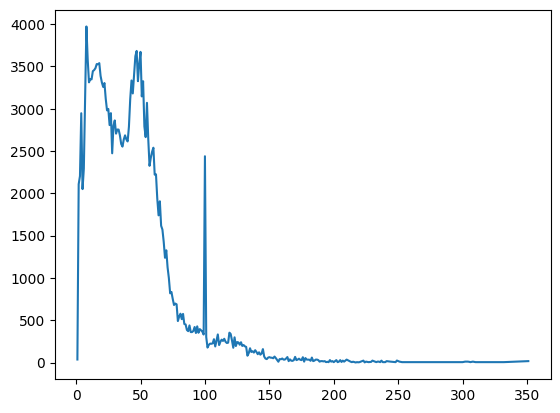

In [71]:
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(sentence_pair_pos_final)[0].apply(lambda x:len(x)).value_counts().sort_index())

In [72]:
pd.DataFrame(sentence_pair_pos_final)[0].apply(lambda x:len(x)).value_counts().sort_index()[:20]

0
1       37
2     2108
3     2204
4     2946
5     2050
6     2291
7     3157
8     3971
9     3581
10    3311
11    3349
12    3346
13    3443
14    3456
15    3478
16    3527
17    3525
18    3538
19    3387
20    3310
Name: count, dtype: int64